In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lecture des données et séparation test - train

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test ) = cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


Le dataset d'entrainement possede donc 50 000 elements, chaque element est de taille 32 pixels x 32 pixels, et possède 3 couleurs

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape


(32, 32, 3)

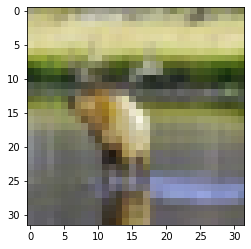

In [ ]:
plt.imshow(x_train[89])

on affiche la classe de la photo numero 89

In [ ]:
y_train[89]

array([4], dtype=uint8)

# Normalisation des données 

la valeur maximale que peut avoir un pixel est 255, leurs valeurs va donc de 0 a 255, et on veut qu'elle aille de 0 a 1, donc on divise tout par 255

In [ ]:
x_train[0].max()

255

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test / 255

# labels en one hot encoding

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

# creation du modele

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
32*32*3 #taille du tableau apres le flatten

3072

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

# Creation d'un early stopping

Creation d'un early stopping pour que le modele ne s'entraine pas trop et que le phenomene d'overfitting n'arrive pas

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

entrainnement du modele

In [ ]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.7065 - accuracy: 0.3710 - val_loss: 1.2549 - val_accuracy: 0.5526
Epoch 2/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.2136 - accuracy: 0.5685 - val_loss: 1.1553 - val_accuracy: 0.5899
Epoch 3/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0302 - accuracy: 0.6383 - val_loss: 1.0725 - val_accuracy: 0.6275
Epoch 4/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9189 - accuracy: 0.6779 - val_loss: 0.9945 - val_accuracy: 0.6558
Epoch 5/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8095 - accuracy: 0.7170 - val_loss: 0.9625 - val_accuracy: 0.6662
Epoch 6/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7324 - accuracy: 0.7435 - val_loss: 1.0116 - val_accuracy: 0.6539
Epoch 7/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6471 - accuracy: 0.7749 - val_loss: 0.9926 -

In [ ]:
model.save('cifar10.h5')

# Evaluation du modele

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.493620,0.45710,1.254897,0.5526
1,1.176763,0.58318,1.155331,0.5899
2,1.021953,0.64118,1.072479,0.6275
3,0.912520,0.67948,0.994544,0.6558
4,0.819701,0.71310,0.962490,0.6662
5,0.741039,0.73966,1.011606,0.6539
6,0.663136,0.76804,0.992606,0.6688


In [ ]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

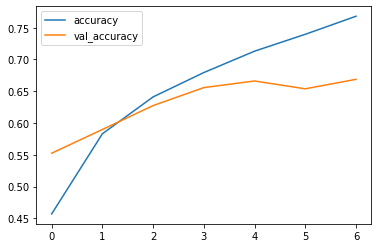

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

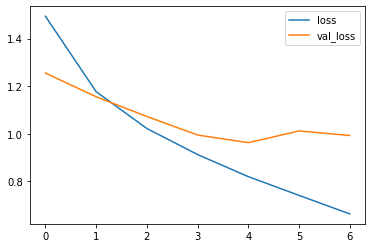

In [ ]:
metrics[['loss','val_loss']].plot()

retourne loss et accuracy du modele

In [ ]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9926 - accuracy: 0.6688


[0.9926057457923889, 0.6687999963760376]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
prediction = np.argmax(model.predict(x_test),axis=1)

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.76      0.80      0.78      1000
           2       0.58      0.58      0.58      1000
           3       0.50      0.46      0.48      1000
           4       0.62      0.60      0.61      1000
           5       0.51      0.68      0.58      1000
           6       0.76      0.71      0.74      1000
           7       0.76      0.68      0.72      1000
           8       0.80      0.71      0.75      1000
           9       0.77      0.72      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [ ]:
confusion_matrix(y_test, prediction)

array([[739,  31,  64,   9,  31,  13,  13,  15,  54,  31],
       [ 20, 804,   9,  16,   5,  11,  15,   3,  23,  94],
       [ 69,   5, 585,  61,  91,  94,  54,  21,  14,   6],
       [ 24,  16,  68, 462,  52, 263,  46,  40,  15,  14],
       [ 20,   6, 104,  64, 603,  74,  51,  58,  14,   6],
       [ 14,   6,  60, 123,  50, 679,  19,  42,   4,   3],
       [  9,   3,  60,  94,  44,  52, 712,   7,  11,   8],
       [ 16,   8,  40,  48,  78, 104,  10, 676,   5,  15],
       [108,  61,  12,  17,  10,  22,   9,   8, 711,  42],
       [ 44, 113,  15,  34,   5,  19,   4,  14,  35, 717]])

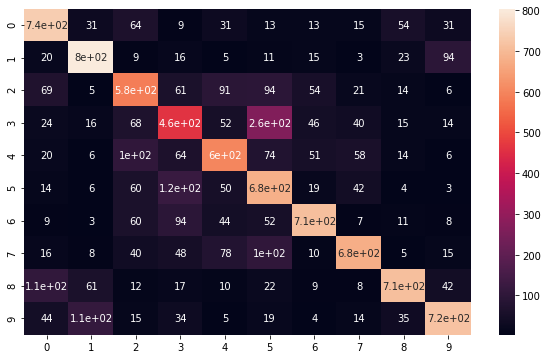

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, prediction),annot=True)

# Prediction d'une image

In [ ]:
my_image = x_test[16]

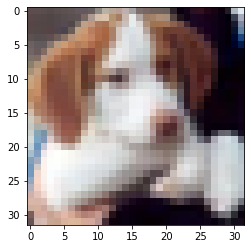

In [ ]:
plt.imshow(my_image)

In [ ]:
y_test[16]

array([5], dtype=uint8)

voici l'index des classes :

1 avion

2 voiture

3 oiseau

4 chat

5 chien

6 grenouille

7 cheval

8 bateau

9 camion


In [ ]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=1)

array([5])